In [1]:
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import librosa
import librosa.display
from getpass import getpass

**Importing The Dataset From Kaggle**

In [7]:
data, sampling_rate = librosa.load('C:/Users/yello/Desktop/UrbanSound8K/audio/fold1/102842-3-0-1.wav')

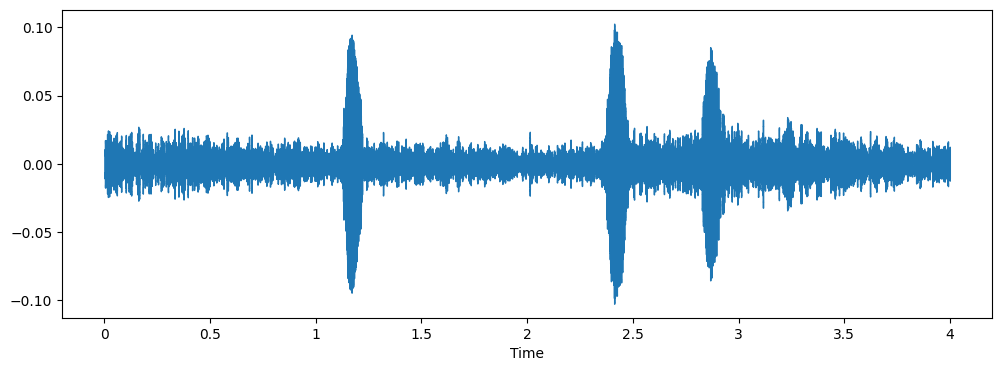

In [8]:
plt.figure(figsize=(12, 4))
librosa.display.waveshow(data, sr=sampling_rate)

In [9]:
data = pd.read_csv('C:/Users/yello/Desktop/UrbanSound8K/metadata/UrbanSound8K.csv')
data.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [10]:
data.describe()

,fsID,start,end,salience,fold,classID
count,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000,8732.000000
mean,116033.493816,38.645409,42.253312,1.347000,5.385937,4.592877
std,57991.017218,74.292126,74.369669,0.476043,2.846820,2.894544
min,344.000000,0.000000,0.105962,1.000000,1.000000,0.000000
25%,69942.250000,3.000000,6.839398,1.000000,3.000000,2.000000
50%,118279.000000,10.376492,14.000000,1.000000,5.000000,4.000000
75%,166942.000000,35.131372,38.866979,2.000000,8.000000,7.000000
max,209992.000000,600.125356,604.125356,2.000000,10.000000,9.000000


In [11]:
appended = []
for i in range(1,11):
    appended.append(data[data.fold == i]['class'].value_counts())
    
class_distribution = pd.DataFrame(appended)
class_distribution = class_distribution.reset_index()
class_distribution['index'] = ["fold"+str(x) for x in range(1,11)]
class_distribution

,index,jackhammer,dog_bark,children_playing,street_music,air_conditioner,drilling,engine_idling,siren,car_horn,gun_shot
0,fold1,120,100,100,100,100,100,96,86,36,35
1,fold2,120,100,100,100,100,100,100,91,42,35
2,fold3,120,100,100,100,100,100,107,119,43,36
3,fold4,120,100,100,100,100,100,107,166,59,38
4,fold5,120,100,100,100,100,100,107,71,98,40
5,fold6,68,100,100,100,100,100,107,74,28,46
6,fold7,76,100,100,100,100,100,106,77,28,51
7,fold8,78,100,100,100,100,100,88,80,30,30
8,fold9,82,100,100,100,100,100,89,82,32,31
9,fold10,96,100,100,100,100,100,93,83,33,32


In [12]:
data['class'].value_counts(normalize=True)

dog_bark            0.114521
children_playing    0.114521
air_conditioner     0.114521
street_music        0.114521
engine_idling       0.114521
jackhammer          0.114521
drilling            0.114521
siren               0.106390
car_horn            0.049130
gun_shot            0.042831
Name: class, dtype: float64

**Loading The Data Into The Notebook**

In [13]:
iteration_number = 0

def parser(row):
  file_name = 'C:/Users/yello/Desktop/UrbanSound8K/audio/fold' + str(row.fold) + '/' + row.slice_file_name
  X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
  mels = np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0) 

  feature = mels
  label = row.classID

  global iteration_number
  iteration_number += 1
  if (iteration_number % 100 == 0):
    print(iteration_number)
  return feature, label

In [14]:
transformed_data = data.apply(parser, axis = 1)

100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500


c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)


3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300


c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
c:\Users\yello\AppData\Local\Programs\Python\Python310\lib\site-packages\librosa\util\decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)


8400
8500
8600
8700


**Preprocessing The Data**

In [15]:
transformed_data = list(transformed_data)
transformed_data.index

<function list.index(value, start=0, stop=9223372036854775807, /)>

In [16]:
# transformed_data
transformed_data

[(array([2.3283628e-05, 2.1359067e-04, 2.8440380e-04, 5.3810340e-04,
         4.9540616e-04, 1.0827768e-03, 5.1993751e-03, 3.5948153e-03,
         3.0365635e-03, 1.1613710e-03, 6.6781387e-04, 1.5533651e-03,
         1.7063342e-03, 1.8260618e-03, 3.1036842e-03, 9.1875130e-03,
         6.5960325e-03, 4.6529896e-03, 1.5760569e-02, 3.3774711e-02,
         1.0552420e-01, 3.3830580e-01, 2.8094569e-01, 3.6958316e-01,
         1.7159154e+00, 6.5498815e+00, 2.7261987e+00, 4.2376456e+00,
         5.7570486e+00, 1.1780505e+01, 3.5155296e+01, 4.2300732e+01,
         5.7533722e+01, 1.7537485e+01, 1.1372511e+01, 1.4538245e+01,
         8.2135019e+00, 5.4653311e+00, 1.7866947e+01, 3.9050770e+01,
         1.4519774e+01, 1.9841825e+01, 1.0210389e+01, 5.7753615e+00,
         1.8238486e+00, 1.4717246e+00, 1.6659281e+00, 1.4016455e+00,
         2.9428976e+00, 7.2478528e+00, 3.9709704e+00, 1.7648830e+00,
         1.7126188e+00, 3.6559606e+00, 2.8441701e+00, 1.7219990e+01,
         4.1166012e+01, 3.0191889e

In [17]:
transformed_data = pd.DataFrame(transformed_data, columns = ['feature', 'label'])
transformed_data

,feature,label
0,"[2.3283628e-05, 0.00021359067, 0.0002844038, 0...",3
1,"[0.049608395, 0.049436085, 0.03691951, 0.02867...",2
2,"[0.030883819, 0.027941372, 0.036278624, 0.0257...",2
3,"[0.026432991, 0.032280095, 0.04545298, 0.03293...",2
4,"[0.06138195, 0.040278364, 0.02294883, 0.015539...",2
...,...,...
8727,"[0.017539999, 0.033781983, 0.02726127, 0.03459...",1
8728,"[0.0088033015, 0.019734537, 0.016589222, 0.008...",1
8729,"[0.016069045, 0.06248836, 0.062083136, 0.06402...",1
8730,"[0.024163222, 0.07749511, 0.06344367, 0.032645...",1


In [18]:
X = np.array(transformed_data.feature.tolist())
Y = np.array(transformed_data.label.tolist())

In [19]:
X.shape

(8732, 128)

In [20]:
Y.shape

(8732,)

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,test_size=0.1)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7858, 128)
(874, 128)
(7858,)
(874,)


In [23]:
from keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 10)
Y_test = to_categorical(Y_test, num_classes = 10)

In [24]:
X_train = X_train.reshape(-1, 16, 8, 1)
X_test = X_test.reshape(-1, 16, 8, 1)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(7858, 16, 8, 1)
(874, 16, 8, 1)
(7858, 10)
(874, 10)


**Training The Model**

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, LSTM, SimpleRNN, Conv2D, MaxPool2D

In [27]:
model = Sequential([
  Conv2D(128, (2, 2), input_shape=(16, 8, 1), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Conv2D(256, (2, 2), padding='same', activation='tanh'),
  MaxPool2D(pool_size=(2, 2)),
  Dropout(0.2),
  Flatten(),
  Dense(1024, activation='tanh'),
  Dropout(0.1),
  Dense(512, activation='relu'),
  Dropout(0.1),
  Dense(10, activation='softmax')
])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 16, 8, 128)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 8, 4, 128)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 4, 256)         131328    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 2, 256)        0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 4, 2, 256)         0         
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [29]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
# Print the lengths of the each dataset
print(f"x_train : {len(X_train)}")
print(f"x_test : {len(X_test)}")
print(f"y_train : {len(Y_train)}")
print(f"y_test : {len(Y_test)}")

x_train : 7858
x_test : 874
y_train : 7858
y_test : 874


In [35]:
hist = model.fit(X_train, Y_train, batch_size=50, epochs=200, validation_data=(X_test, Y_test))

Epoch 1/200
158/158 [==============================] - 7s 43ms/step - loss: 0.0665 - accuracy: 0.9785 - val_loss: 1.3307 - val_accuracy: 0.8638
Epoch 2/200
158/158 [==============================] - 6s 41ms/step - loss: 0.0596 - accuracy: 0.9808 - val_loss: 1.3484 - val_accuracy: 0.8570
Epoch 3/200
158/158 [==============================] - 7s 41ms/step - loss: 0.0637 - accuracy: 0.9809 - val_loss: 1.4720 - val_accuracy: 0.8604
Epoch 4/200
158/158 [==============================] - 7s 41ms/step - loss: 0.0659 - accuracy: 0.9796 - val_loss: 1.3461 - val_accuracy: 0.8673
Epoch 5/200
158/158 [==============================] - 7s 42ms/step - loss: 0.0755 - accuracy: 0.9754 - val_loss: 1.6092 - val_accuracy: 0.8616
Epoch 6/200
158/158 [==============================] - 7s 42ms/step - loss: 0.0753 - accuracy: 0.9780 - val_loss: 1.5348 - val_accuracy: 0.8593
Epoch 7/200
158/158 [==============================] - 7s 42ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 1.5707 - val_accuracy:

**Evaluating The Model**

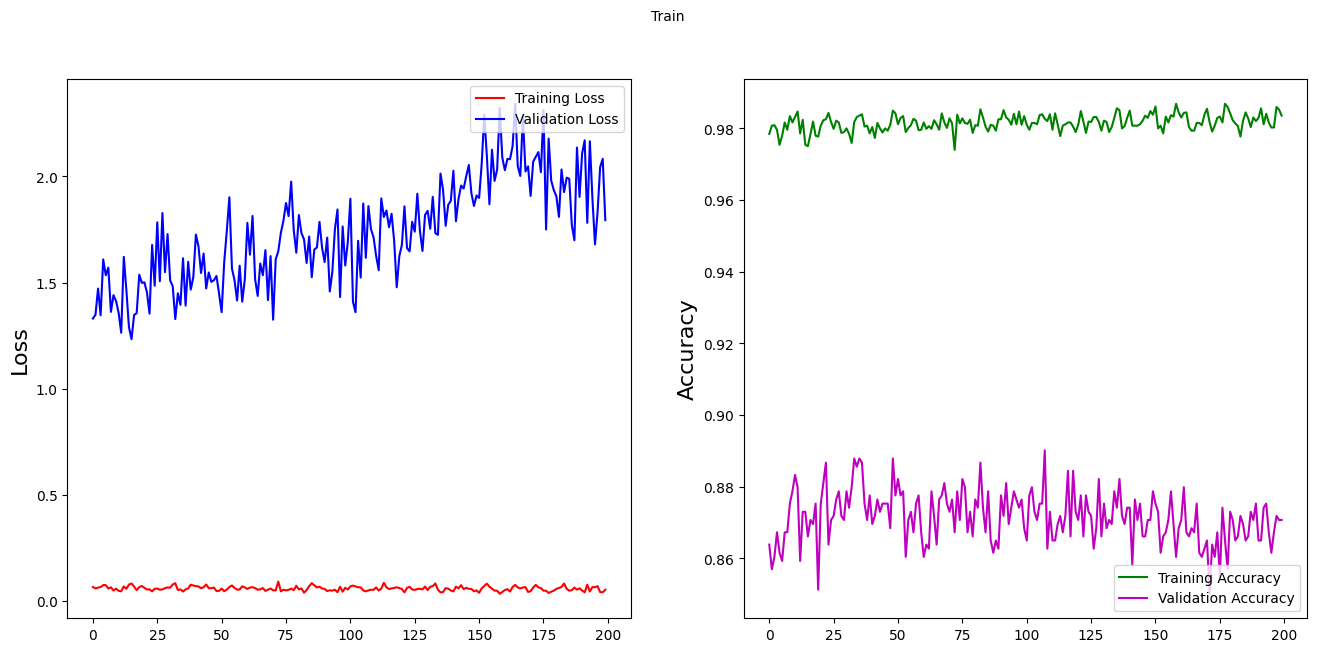

In [40]:
plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.suptitle('Train',fontsize=10)
plt.ylabel('Loss',fontsize=16)
plt.plot(hist.history['loss'],color='r',label='Training Loss')
plt.plot(hist.history['val_loss'],color='b',label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1,2,2)
plt.ylabel('Accuracy',fontsize=16)
plt.plot(hist.history['accuracy'],color='g',label='Training Accuracy')
plt.plot(hist.history['val_accuracy'],color='m',label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [32]:
model.evaluate(X_test, Y_test)

28/28 [==============================] - 0s 9ms/step - loss: 1.5406 - accuracy: 0.8638


[1.5406361818313599, 0.8638443946838379]

We have achieved 87.35% accuracy on the testing data.